In [52]:
import numpy as np
import pandas as pd
import string
import random
import os
import datetime
import time
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

## Utility Functions

In [2]:
def set_seed(seed: int) : 
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)

set_seed(43)

In [3]:
def plot_predt(y , y_predt) -> None:
    # s = 25
    plt.plot(range(0, len(y)), y, c="red", label="data")
    plt.plot(
        range(0, len(y_predt)), y_predt, c="blue", 
    )
    plt.show()

def visualize_feat_importance(feature_important):
  keys = list(feature_important.keys())
  values = list(feature_important.values())

  data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
  data.nlargest(40, columns="score").plot(kind='barh', figsize = (10,5)) ## plot top 40 features

In [4]:
def id_generator(size=6, chars=string.ascii_uppercase + string.digits):
  return ''.join(random.choice(chars) for _ in range(size))

def name_generator(size=6, chars=string.ascii_uppercase + string.ascii_lowercase + ' '):
  return ''.join(random.choice(chars) for _ in range(size))

In [5]:
def __random_num_error(base, base_percent, err_percent):
  return int(base * ((random.randint(-err_percent, err_percent) + base_percent) / 100))

def __random_a_list(list_categories, length_output):
  return random.sample(list_categories, length_output)

def __random_date(second_as_unit=False): # from 
    d = random.randint(1380235398, int(time.time())) # from 2013-09-26, yyyy-mm-dd
    if second_as_unit: 
      return d
    else:
      return datetime.datetime.fromtimestamp(d).strftime('%Y-%m-%d')

def __time_distance(present, past): ## milisecond, the range start from 2013-09-26 to today: 31/03/2023
  return (present - past) / (60 * 60 * 24 * 365) # year

## Template

In [6]:
dataset_size = 100020

range_week = 12
num_view_max = 1e6
num_user_max = 1e6
num_paid_max = 5e5
num_money_max = 6e8

num_follower_max = 5e6
num_like_max = 5e6
num_new_paid_max = 1e4

# get from ChatGPT, prompt: generate a python list of string contains k most popular category of film / actors in the world, minimize the number of line in the code
actor_template = ['Tom Cruise', 'Dwayne Johnson', 'Jennifer Lawrence', 'Scarlett Johansson', 'Leonardo DiCaprio', 'Brad Pitt', 'Robert Downey Jr.', 'Will Smith', 'Johnny Depp', 'Angelina Jolie', 'Harrison Ford', 'Chris Hemsworth', 'Chris Evans', 'Mark Wahlberg', 'Vin Diesel', 'Sandra Bullock', 'Emma Stone', 'Meryl Streep', 'Julia Roberts', 'Charlize Theron', 'Anne Hathaway', 'Cate Blanchett', 'Nicole Kidman', 'Jessica Chastain', 'Natalie Portman', 'Joaquin Phoenix', 'Matt Damon', 'Christian Bale', 'Ben Affleck', 'Hugh Jackman', 'Keanu Reeves', 'Sylvester Stallone', 'Bruce Willis', 'Jason Statham', 'Samuel L. Jackson', 'Kevin Hart', 'Jim Carrey', 'Adam Sandler', 'Eddie Murphy', 'Jackie Chan', 'Jet Li', 'Donnie Yen', 'Tony Jaa', 'Chow Yun-fat', 'Michelle Yeoh', 'Ken Watanabe', 'Lucy Liu', 'Maggie Q', 'Zhang Ziyi']
follower_template = [random.randint(10000, 10000000) for actor in actor_template]

rating_template = ['G', 'PG', 'PG-13', 'R', 'NC-17']
rating_ranking = list(range(len(rating_template) - 1, -1, -1 ))

country_template = ['United States', 'India', 'China', 'Japan', 'South Korea', 'United Kingdom', 'France', 'Germany', 'Spain', 'Italy', 'Canada', 'Australia', 'Brazil', 'Mexico', 'Russia', 'Nigeria', 'Iran', 'Argentina', 'Turkey', 'Egypt']
country_ranking = list(range(len(country_template) - 1, -1, -1))


plot_keyword_template = ['love', 'death', 'friendship', 'family', 'revenge', 'betrayal', 'survival', 'crime', 'murder', 'police', 'comedy', 'romance', 'drama', 'action', 'adventure', 'fantasy', 'science fiction', 'superhero', 'horror', 'thriller']
plot_ranking = list(range(len(plot_keyword_template) - 1, -1, -1))

studio_template = ["Walt Disney Studios", "Warner Bros. Pictures", "Universal Pictures", "20th Century Studios", "Paramount Pictures", "Sony Pictures Entertainment", "Metro-Goldwyn-Mayer (MGM)", "DreamWorks Pictures", "Lionsgate Films", "New Line Cinema"]
studio_ranking = list(range(len(studio_template) - 1, -1, -1))


director_template = ["Steven Spielberg", "Martin Scorsese", "Christopher Nolan", "Quentin Tarantino", "James Cameron", "Alfred Hitchcock", "Stanley Kubrick", "Francis Ford Coppola", "Woody Allen", "Clint Eastwood", "Tim Burton", "David Fincher", "Ridley Scott", "Spike Lee", "Ang Lee", "Oliver Stone", "Guillermo del Toro", "Joel Coen", "Ethan Coen", "Akira Kurosawa"]
director_ranking = list(range(len(director_template) -1, -1, -1))
 


## Data Generation

In [7]:
raw = [] 
for idx in range(dataset_size):
  tmp = [] 
  
  id = id_generator(7) # id
  name = name_generator(20) # name 
  # cat = category_template[random.randint(0, len(category_template) - 1)] # categories
  studio = studio_template[random.randint(0, len(studio_template) - 1)] # studio
  director = director_template[random.randint(0, len(director_template)  - 1)] # director
  rating = rating_template[random.randint(0, len(rating_template)  - 1)]
  time_spend = random.randint(1, 100)
  duration = random.randint(60, 200)
  gross = random.randint(int(num_money_max * 0.05), num_money_max)
  budget = __random_num_error(gross, 100, 80)
  country = country_template[random.randint(0, len(country_template) - 1)]

  act = __random_a_list(actor_template, 5) # actor_template[random.randint(0, len(actor_template) - 1)] # actor
  plot_keyword = __random_a_list(plot_keyword_template, 5)

  # release_date = __random_date()
  release_date_distance =   __time_distance(__random_date(second_as_unit=True), time.time())

  imdb = random.uniform(0, 10)
  meta_critic = random.uniform(0, 10)
  rotten_tomato_score = random.uniform(0, 10)

  num_likes = random.randint(0, num_like_max)
  num_comments = __random_num_error(num_likes, 20, 10)
  num_dislike = __random_num_error(num_likes, 20, 10)
  


  num_view = random.randint(0, num_view_max * 10) # num_view
  
  # label
  num_view_in_range = random.randint(0, num_view) # num_view_in_range
  num_user_in_range = __random_num_error(num_view_in_range, 70, 30) # num_user_in_range
  num_unpaid_user_in_range = __random_num_error(num_user_in_range, 60, 20) # num_user_in_range
  num_paid_in_range = num_user_in_range - num_unpaid_user_in_range # num_paid_in_range
  num_new_paid_in_range = __random_num_error(num_user_in_range, 30, 10) # num_new_paid_in_range

  tmp = [id, name, studio, director, rating, time_spend, duration, gross, budget, country, act, plot_keyword, release_date_distance, imdb, meta_critic, rotten_tomato_score, num_likes, num_comments, num_dislike, num_view, num_view_in_range, num_user_in_range, num_unpaid_user_in_range, num_paid_in_range, num_new_paid_in_range]
  raw.append(tmp)

## Data Preprocessing

In [8]:
raw_data = pd.DataFrame(data = raw, columns = ['id', 'name', 'studio', 'director', 'rating', 'time_spend', 'duration', 'gross', 'budget', 'country', 'act', 'plot_keyword', 'release_date_distance', 'imdb', 'meta_critic', 'rotten_tomato_score', 'num_likes', 'num_comments', 'num_dislike', 'num_view', 'num_view_in_range', 'num_user_in_range', 'num_unpaid_user_in_range', 'num_paid_in_range', 'num_new_paid_in_range'])
raw_data

,id,name,studio,director,rating,time_spend,duration,gross,budget,country,...,rotten_tomato_score,num_likes,num_comments,num_dislike,num_view,num_view_in_range,num_user_in_range,num_unpaid_user_in_range,num_paid_in_range,num_new_paid_in_range
0,VV72KIF,xUDlRXuLrmEjqHTfxuXt,Metro-Goldwyn-Mayer (MGM),Martin Scorsese,R,54,81,414529651,215555418,China,...,9.766077,1042870,146001,104287,5664676,994395,845235,625473,219762,295832
1,Q3VYFCF,tNrZMrkZQmlazUZWDLiL,20th Century Studios,Martin Scorsese,PG,39,116,400870392,272591866,France,...,7.642179,1296961,220483,129696,1818700,1466432,791873,372180,419693,300911
2,0MY1GAL,YHVUQiIikJsPMPCFResR,Warner Bros. Pictures,Oliver Stone,PG-13,19,141,269754354,59345957,France,...,4.277739,3637606,945777,1018529,1182590,448157,354044,283235,70809,84970
3,BGFOMM7,DQKfdaTEVdcsRfIHzUWV,Sony Pictures Entertainment,Quentin Tarantino,R,90,174,380601957,376795937,France,...,1.560087,1175364,176304,352609,9876325,8515350,7238047,3763784,3474263,2026653
4,5Y7LQG6,XIGbTgwQGJkshZDYkcod,Lionsgate Films,Oliver Stone,NC-17,83,87,39604248,57030117,Nigeria,...,0.823032,2776967,305466,333236,9331196,5393389,2750628,1127757,1622871,1100251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100015,YFO7DMF,UnadWJlFExZetHKEGdS,Metro-Goldwyn-Mayer (MGM),Guillermo del Toro,G,52,94,151495061,184823974,India,...,7.952821,2951017,737754,560693,2094616,255590,186580,95155,91425,52242
100016,8E9CY59,DGEqLSqrB gyjWCLJnbw,Universal Pictures,Woody Allen,R,70,108,289584757,280897214,United States,...,7.801194,564296,146716,146716,4642169,3209706,2888735,1935452,953283,577747
100017,8PWULZA,RZXN XYrZbczAAJARsQp,Paramount Pictures,Woody Allen,NC-17,34,148,219351585,390445821,China,...,4.633452,4010945,882407,1082955,8950532,4999799,2199911,1715930,483981,813967
100018,J425V4W,GTyGHZOytCpdBwMgqVSF,DreamWorks Pictures,Ang Lee,R,83,135,534622464,940935536,Italy,...,2.485853,450941,117244,45094,7726502,4045340,2669924,1361661,1308263,747578


In [9]:
raw_data.to_csv('generated_data.csv', index=False)

In [10]:
## count the total number followers of all the actors, then drop actor
## calculate the potential of plot, simplify by just get the index then calculate the sum  

In [11]:
def __count_followers(df_row):
  sum = 0
  for act in df_row['act']:
    sum += follower_template[actor_template.index(act)]

  return sum
raw_data['total_actors_followers'] = raw_data.apply(lambda row: __count_followers(row), axis=1)

In [12]:
def __calculate_potential_plot_point(df_row):
  sum = 0
  # print(df_row)
  for keyword in df_row['plot_keyword']:
    sum += plot_ranking[plot_keyword_template.index(keyword)]

  return sum
raw_data['potential_plot_point'] = raw_data.apply(lambda row: __calculate_potential_plot_point(row), axis=1)

In [13]:
raw_data['rating'] = raw_data.apply(lambda row: rating_ranking[rating_template.index(row['rating'])], axis=1)
raw_data['studio'] = raw_data.apply(lambda row: studio_ranking[studio_template.index(row['studio'])], axis=1)
raw_data['director'] = raw_data.apply(lambda row: director_ranking[director_template.index(row['director'])], axis=1)
raw_data['country'] = raw_data.apply(lambda row: director_ranking[country_template.index(row['country'])], axis=1)

In [14]:
raw_data

,id,name,studio,director,rating,time_spend,duration,gross,budget,country,...,num_comments,num_dislike,num_view,num_view_in_range,num_user_in_range,num_unpaid_user_in_range,num_paid_in_range,num_new_paid_in_range,total_actors_followers,potential_plot_point
0,VV72KIF,xUDlRXuLrmEjqHTfxuXt,3,18,1,54,81,414529651,215555418,17,...,146001,104287,5664676,994395,845235,625473,219762,295832,14108049,47
1,Q3VYFCF,tNrZMrkZQmlazUZWDLiL,6,18,3,39,116,400870392,272591866,13,...,220483,129696,1818700,1466432,791873,372180,419693,300911,34575695,56
2,0MY1GAL,YHVUQiIikJsPMPCFResR,8,4,2,19,141,269754354,59345957,13,...,945777,1018529,1182590,448157,354044,283235,70809,84970,26120319,20
3,BGFOMM7,DQKfdaTEVdcsRfIHzUWV,4,16,1,90,174,380601957,376795937,13,...,176304,352609,9876325,8515350,7238047,3763784,3474263,2026653,25679863,49
4,5Y7LQG6,XIGbTgwQGJkshZDYkcod,1,4,0,83,87,39604248,57030117,4,...,305466,333236,9331196,5393389,2750628,1127757,1622871,1100251,17975697,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100015,YFO7DMF,UnadWJlFExZetHKEGdS,3,3,4,52,94,151495061,184823974,18,...,737754,560693,2094616,255590,186580,95155,91425,52242,19757444,35
100016,8E9CY59,DGEqLSqrB gyjWCLJnbw,7,11,1,70,108,289584757,280897214,19,...,146716,146716,4642169,3209706,2888735,1935452,953283,577747,29907657,54
100017,8PWULZA,RZXN XYrZbczAAJARsQp,5,11,0,34,148,219351585,390445821,17,...,882407,1082955,8950532,4999799,2199911,1715930,483981,813967,29864315,46
100018,J425V4W,GTyGHZOytCpdBwMgqVSF,2,5,1,83,135,534622464,940935536,10,...,117244,45094,7726502,4045340,2669924,1361661,1308263,747578,21522912,59


In [15]:
raw_data = raw_data.drop(columns=['id', 'name', 'act', 'plot_keyword'])

In [16]:
raw_data.to_csv('test.csv', index=False)
raw_data

,studio,director,rating,time_spend,duration,gross,budget,country,release_date_distance,imdb,...,num_comments,num_dislike,num_view,num_view_in_range,num_user_in_range,num_unpaid_user_in_range,num_paid_in_range,num_new_paid_in_range,total_actors_followers,potential_plot_point
0,3,18,1,54,81,414529651,215555418,17,-7.021252,0.025195,...,146001,104287,5664676,994395,845235,625473,219762,295832,14108049,47
1,6,18,3,39,116,400870392,272591866,13,-3.633672,2.634924,...,220483,129696,1818700,1466432,791873,372180,419693,300911,34575695,56
2,8,4,2,19,141,269754354,59345957,13,-0.178547,4.868332,...,945777,1018529,1182590,448157,354044,283235,70809,84970,26120319,20
3,4,16,1,90,174,380601957,376795937,13,-6.426250,3.029323,...,176304,352609,9876325,8515350,7238047,3763784,3474263,2026653,25679863,49
4,1,4,0,83,87,39604248,57030117,4,-7.007994,9.504380,...,305466,333236,9331196,5393389,2750628,1127757,1622871,1100251,17975697,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100015,3,3,4,52,94,151495061,184823974,18,-8.278923,7.415772,...,737754,560693,2094616,255590,186580,95155,91425,52242,19757444,35
100016,7,11,1,70,108,289584757,280897214,19,-6.657444,5.720418,...,146716,146716,4642169,3209706,2888735,1935452,953283,577747,29907657,54
100017,5,11,0,34,148,219351585,390445821,17,-4.865345,3.436442,...,882407,1082955,8950532,4999799,2199911,1715930,483981,813967,29864315,46
100018,2,5,1,83,135,534622464,940935536,10,-5.833581,8.933030,...,117244,45094,7726502,4045340,2669924,1361661,1308263,747578,21522912,59


In [17]:
cols = list(raw_data.columns)
target_cols = ['label', 'num_view_in_range',	'num_user_in_range',	'num_unpaid_user_in_range', 'num_paid_in_range', 'num_new_paid_in_range']

cols = [col for col in cols if col not in ['num_view_in_range', 'num_user_in_range', 'num_unpaid_user_in_range', 'num_paid_in_range', 'num_new_paid_in_range']]
mean = []
std = []

for col in cols: 
  mean.append(raw_data[col].mean())
  std.append(raw_data[col].std())

In [18]:
cols

['studio',
 'director',
 'rating',
 'time_spend',
 'duration',
 'gross',
 'budget',
 'country',
 'release_date_distance',
 'imdb',
 'meta_critic',
 'rotten_tomato_score',
 'num_likes',
 'num_comments',
 'num_dislike',
 'num_view',
 'total_actors_followers',
 'potential_plot_point']

In [19]:
def __standard_scaler(df_row):
  for col in cols:
    df_row[col] = (df_row[col] - mean[cols.index(col)]) / std[cols.index(col)]
  return df_row

def __reversed_standard_scaler(df_row):
  for col in cols:
    df_row[col] = df_row[col] * std[cols.index(col)] + mean[cols.index(col)] 
  return df_row

In [20]:
raw_data = raw_data.apply(lambda row: __standard_scaler(row), axis=1)

In [21]:
raw_data

,studio,director,rating,time_spend,duration,gross,budget,country,release_date_distance,imdb,...,num_comments,num_dislike,num_view,num_view_in_range,num_user_in_range,num_unpaid_user_in_range,num_paid_in_range,num_new_paid_in_range,total_actors_followers,potential_plot_point
0,-0.527071,1.476288,-0.705700,0.116836,-1.214222,0.604754,-0.427103,1.308413,-0.822788,-1.722164,...,-1.049117,-1.173829,0.228965,994395.0,845235.0,625473.0,219762.0,295832.0,-1.470775,-0.049212
1,0.518782,1.476288,0.707155,-0.402416,-0.351736,0.521778,-0.182929,0.612834,0.410292,-0.818097,...,-0.828222,-1.098308,-1.104579,1466432.0,791873.0,372180.0,419693.0,300911.0,1.582545,0.735191
2,1.216018,-0.950629,0.000727,-1.094752,0.264325,-0.274723,-1.095841,0.612834,1.667959,-0.044396,...,1.322825,1.543492,-1.325142,448157.0,354044.0,283235.0,70809.0,84970.0,0.321190,-2.402424
3,-0.178453,1.129585,-0.705700,1.363040,1.077526,0.398651,0.263172,0.612834,-0.606207,-0.681469,...,-0.959246,-0.435763,1.689300,8515350.0,7238047.0,3763784.0,3474263.0,2026653.0,0.255484,0.125100
4,-1.224307,-0.950629,-1.412128,1.120723,-1.066367,-1.672833,-1.105755,-0.952219,-0.817962,1.561633,...,-0.576182,-0.493344,1.500284,5393389.0,2750628.0,1127757.0,1622871.0,1100251.0,-0.893807,-0.223524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100015,-0.527071,-1.123980,1.413582,0.047602,-0.893870,-0.993122,-0.558666,1.482308,-1.280580,0.838093,...,0.705879,0.182706,-1.008908,255590.0,186580.0,95155.0,91425.0,52242.0,-0.628010,-1.095084
100016,0.867400,0.262829,-0.705700,0.670705,-0.548876,-0.154258,-0.147373,1.656203,-0.690362,0.250785,...,-1.046997,-1.047721,-0.125577,3209706.0,2888735.0,1935452.0,953283.0,577747.0,0.886177,0.560879
100017,0.170165,0.262829,-1.412128,-0.575500,0.436823,-0.580908,0.321608,1.308413,-0.038037,-0.540434,...,1.134885,1.734980,1.368293,4999799.0,2199911.0,1715930.0,483981.0,813967.0,0.879711,-0.136368
100018,-0.875689,-0.777278,-0.705700,1.120723,0.116471,1.334291,2.678270,0.091150,-0.390475,1.363705,...,-1.134404,-1.349763,0.943876,4045340.0,2669924.0,1361661.0,1308263.0,747578.0,-0.364641,0.996659


In [22]:
def __calculate_label(df_row):
  sum = 0
  for col in cols:
    sum += df_row[col]
  return sum

In [23]:
raw_data['label'] = raw_data.apply(lambda row: __calculate_label(row), axis=1)

In [24]:
len(raw_data[(raw_data['label'] > 0)]) / dataset_size * 100

49.69906018796241

In [25]:
# !pip install catboost

In [26]:
import xgboost as xgb
# import catboost as cb
import hyperopt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.multioutput import MultiOutputRegressor

In [27]:
y = raw_data[target_cols]
X = raw_data.drop(columns=target_cols)

In [28]:
min = []
max = []

for col in target_cols: 
  min.append(y[col].min())
  max.append(y[col].max())

In [45]:
def __minmax_scaler(df_row, target_cols):
  for col in target_cols:
    df_row[col] = (df_row[col] - min[target_cols.index(col)]) / (max[target_cols.index(col)] - min[target_cols.index(col)]) 
  return df_row

def __reversed_minmax_scaler(df_row, target_cols):
  for col in target_cols:
    df_row[col] = df_row[col] *  (max[target_cols.index(col)] - min[target_cols.index(col)]) + min[target_cols.index(col)] 
  return df_row

In [30]:
y = y.apply(lambda row: __minmax_scaler(row, target_cols), axis=1)

In [31]:
y

,label,num_view_in_range,num_user_in_range,num_unpaid_user_in_range,num_paid_in_range,num_new_paid_in_range
0,0.376691,0.100268,0.087223,0.087708,0.039010,0.080436
1,0.471102,0.147866,0.081716,0.052189,0.074502,0.081817
2,0.468466,0.045188,0.036534,0.039717,0.012569,0.023102
3,0.456403,0.858641,0.746933,0.527790,0.616741,0.551050
4,0.244532,0.543839,0.283851,0.158143,0.288087,0.299159
...,...,...,...,...,...,...
100015,0.412544,0.025771,0.019253,0.013343,0.016228,0.014204
100016,0.425343,0.323648,0.298103,0.271405,0.169223,0.157089
100017,0.562857,0.504152,0.227020,0.240622,0.085914,0.221318
100018,0.500065,0.407909,0.275523,0.190943,0.232238,0.203267


In [32]:
X_test = X[-20:]
y_test = y[-20:]

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [34]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(70014, 18)
(30006, 18)
(70014, 6)
(30006, 6)


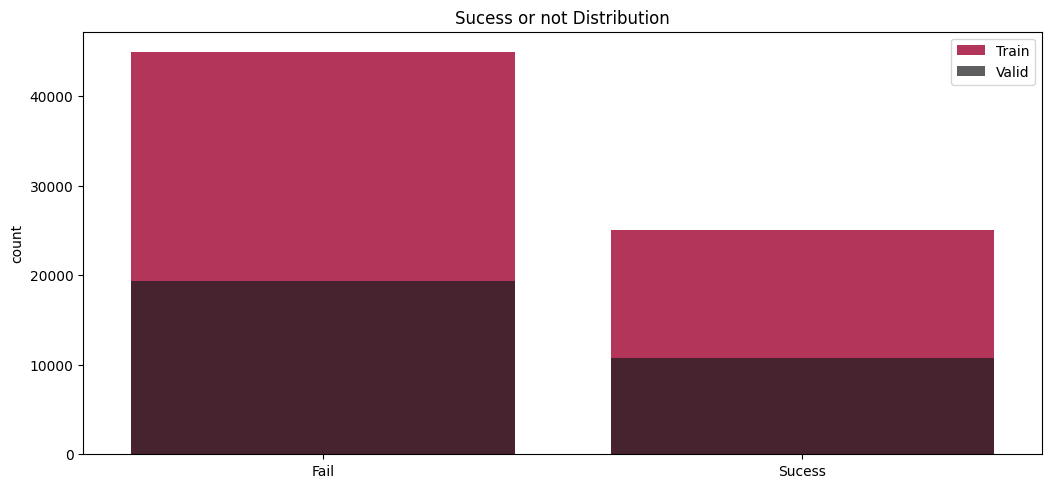

In [59]:
label_train_visualization = ['Sucess' if logic else 'Fail' for logic in y_train['label'] >= 0.5 ]
label_val_visualization = ['Sucess'  if logic else 'Fail' for logic in y_val['label'] >= 0.5] 

# Creating a customized chart and giving in figsize etc.

fig = plt.figure(constrained_layout=True, figsize=(20, 9))

# Creating a grid:

grid = gridspec.GridSpec(ncols=4, nrows=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])

# Set the title.

ax1.set_title('Sucess or not Distribution')

sns.countplot(x=label_train_visualization,
              alpha=0.9,
              ax=ax1,
              color='#C3073F',
              label='Train')

sns.countplot(x=label_val_visualization,
              alpha=0.7,
              ax=ax1,
              color='#1A1A1D',
              label='Valid')
ax1.legend()

# # Customizing the second grid.

# ax2 = fig.add_subplot(grid[0, 2:])

# # Plot the countplot.

# sns.countplot(train.location,
#               alpha=0.9,
#               ax=ax2,
#               color='#C3073F',
#               label='Train',
#               order=train['location'].value_counts().index)
# sns.countplot(test.location,
#               alpha=0.7,
#               ax=ax2,
#               color='#1A1A1D',
#               label='Test',
#               order=test['location'].value_counts().index), ax2.set_title(
#                   'Anatom Site Distribution')

# ax2.legend()
# plt.xticks(rotation=20)

# # Customizing the third grid.

# ax3 = fig.add_subplot(grid[1, :])

# # Set the title.

# ax3.set_title('Age Distribution')

# # Plot the histogram.

# sns.distplot(train.age, ax=ax3, label='Train', color='#C3073F')
# sns.distplot(test.age, ax=ax3, label='Test', color='#1A1A1D')

# ax3.legend()

plt.show()

In [35]:
from sklearn.utils.parallel import Parallel, delayed
from sklearn.base import clone

# the modules from MultiOutputRegressor from sklearn sucks, so i have to copy its source and edit several functions

def _fit_estimator(estimator, X, y, label_idx=0, **fit_params):
  cloned_estimator = clone(estimator)

  if 'eval_set' in fit_params:
    X_train, y_train = fit_params['eval_set'][0]
    y_train = y_train.iloc[:, label_idx]
    
    X_val, y_val = fit_params['eval_set'][1]
    y_val = y_val.iloc[:, label_idx]
    fit_params['eval_set'] = [(X_train, y_train), (X_val, y_val)]

  cloned_estimator.fit(X, y, **fit_params)
  return cloned_estimator


class _FlexibleMultiOutputEstimator():
  def __init__(self, estimator, n_jobs):
      self.prototype_estimator = estimator
      self.n_jobs= n_jobs

  def fit(self, X, y, **fit_params):
      
      self._estimators = Parallel(n_jobs=self.n_jobs)(
          delayed(_fit_estimator)(
              self.prototype_estimator, X, y.iloc[:, label_idx], label_idx, **fit_params
          )
          for label_idx in range(y.shape[1])
      )
  def predict(self, X):
      y = Parallel(n_jobs=self.n_jobs)(
        delayed(e.predict)(X) for e in self._estimators
      )

      return np.asarray(y).T

class FlexibleMultiOutputRegressor(_FlexibleMultiOutputEstimator):
  def __init__(self, estimator, n_jobs=None):
    super().__init__(estimator, n_jobs=n_jobs)




### XGBoost

In [36]:
estimator = xgb.XGBRegressor(
    n_estimators= 100# , max_depth=3, learning_rate=0.006, subsample = 0.7, colsample_bytree= 0.6, random_state= 43, tree_method= "hist", objective="reg:squarederror", n_jobs=-1,
    )
evaluation = [(X_train, y_train), (X_val, y_val)]
xgboost_params = {
    'eval_set': evaluation,
    'eval_metric': "auc", 
    'early_stopping_rounds': 10
}

model = FlexibleMultiOutputRegressor(estimator=estimator, n_jobs=-1)
model.fit(X_train, y_train, **xgboost_params) # , eval_set = evaluation, eval_metric="auc", early_stopping_rounds=10)


In [37]:
# EDA, visualize the result, feature importance of multiple output (regression)
# inference part
# ensemble part
# give several conclusions
# Hyperopt for every model inside the multi-ouput regressor

In [38]:
pred = model.predict(X_val)
preds_df = pd.DataFrame(pred, columns=target_cols)

accuracy = accuracy_score(y_val['label'] > 0.5, preds_df['label'] > 0.5)
print(accuracy)

0.9406785309604746


In [39]:
num_visualized_sample = 100

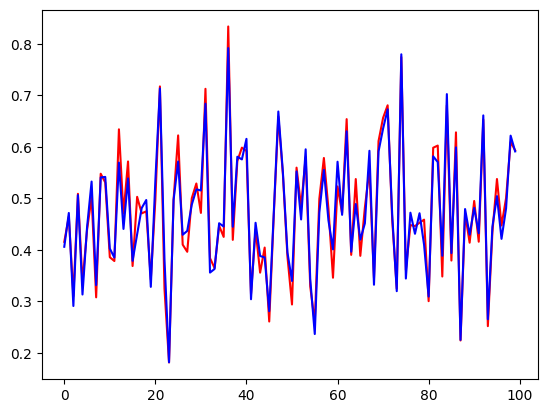

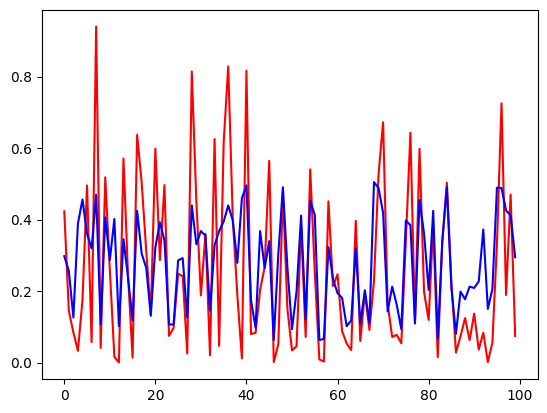

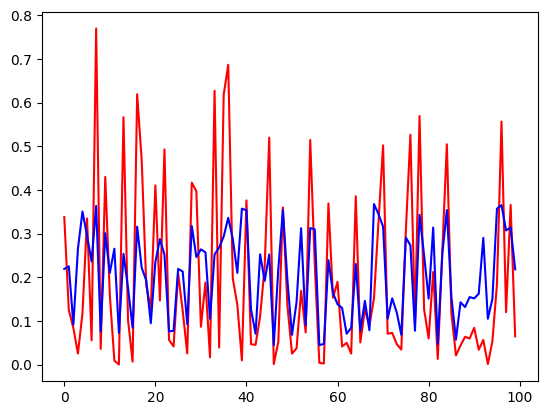

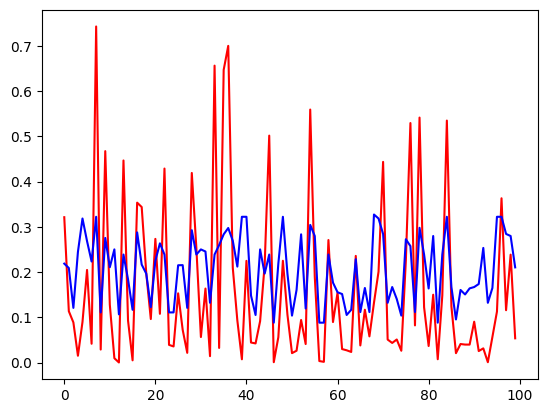

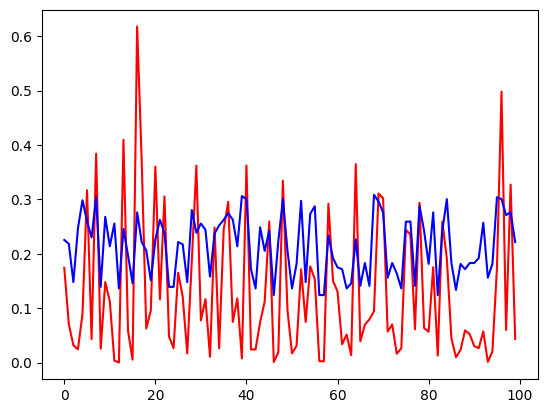

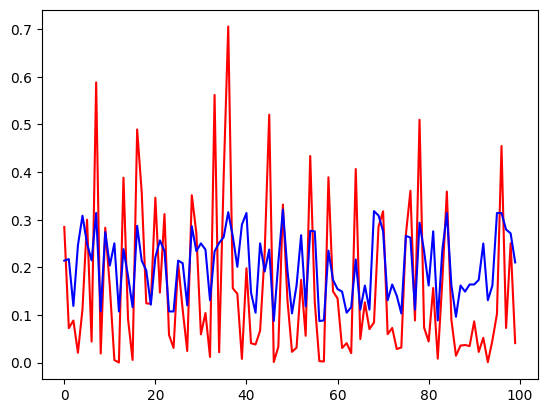

In [40]:
for i in range(0, len(model._estimators)):
  plot_predt(y_val[target_cols[i]][0:num_visualized_sample].to_numpy(), preds_df[target_cols[i]][0:num_visualized_sample].to_numpy())

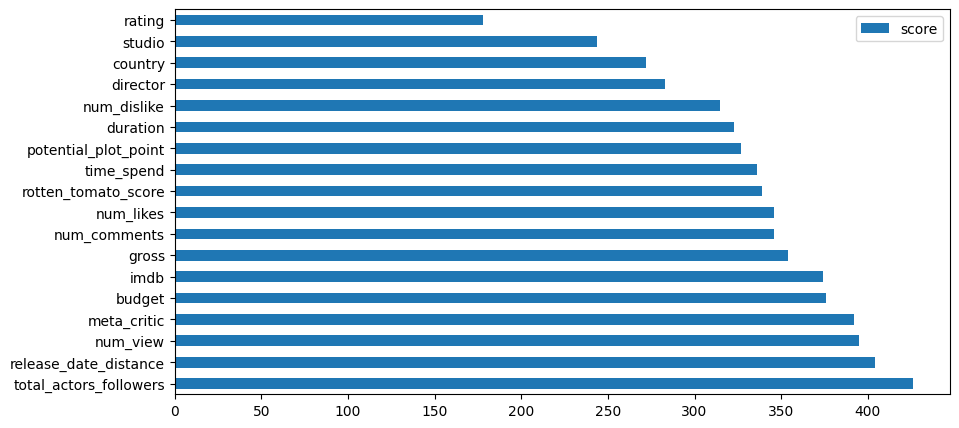

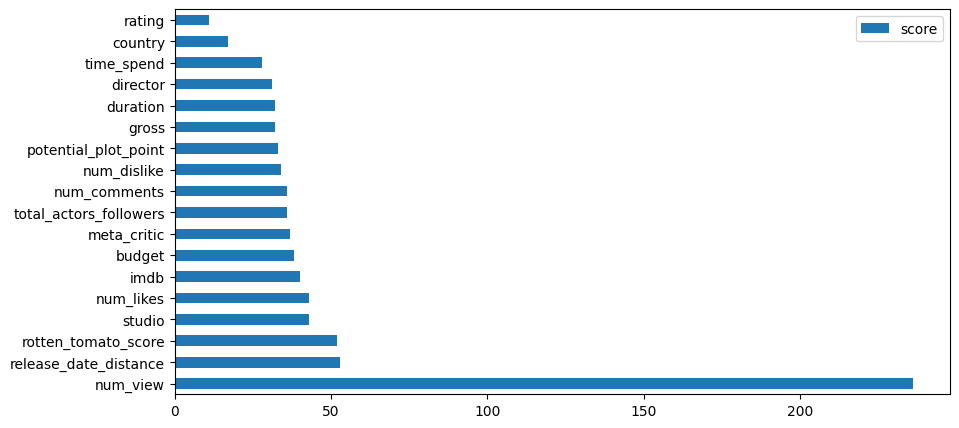

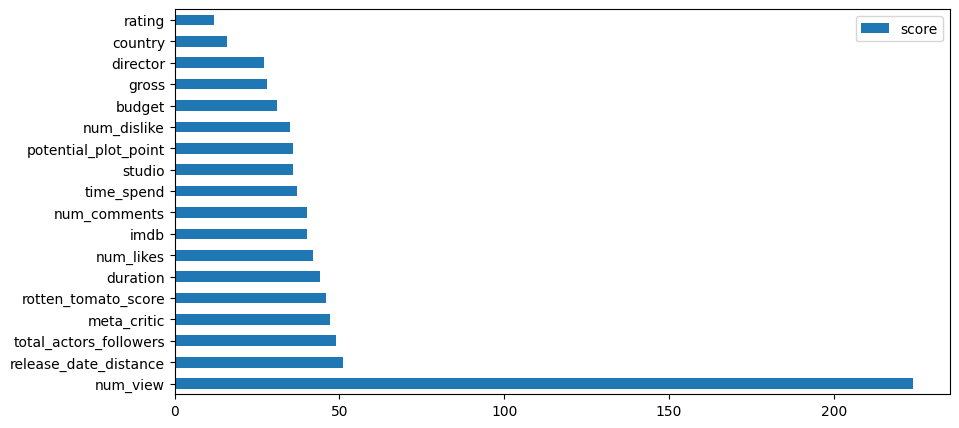

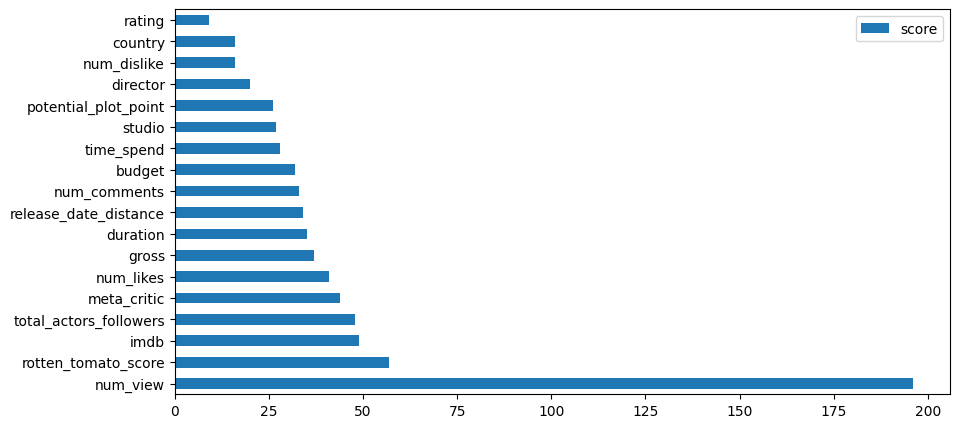

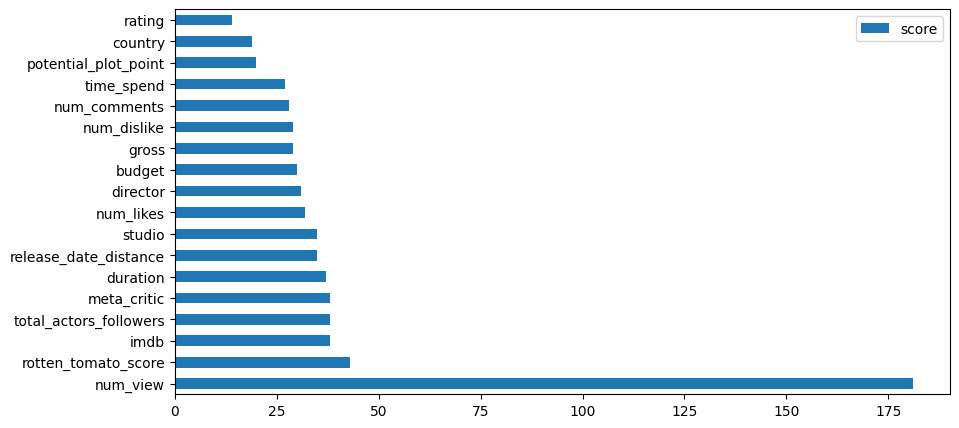

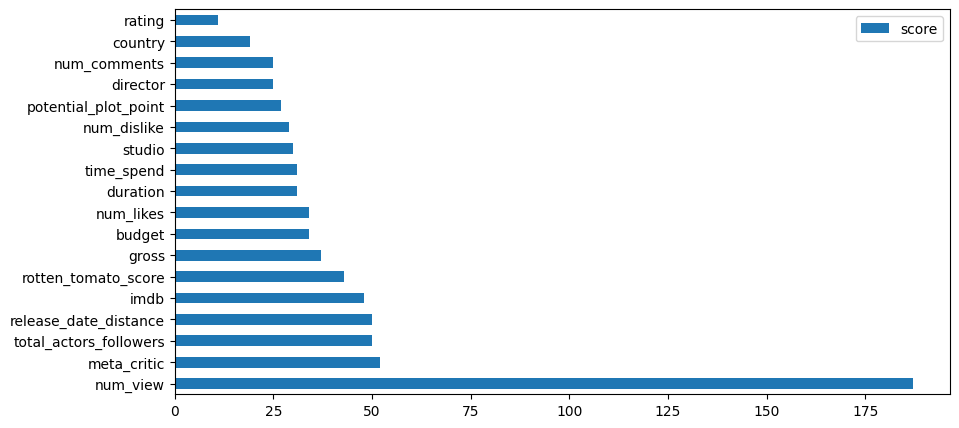

In [41]:
for i in range(0, len(model._estimators)):
  feature_important = model._estimators[i].get_booster().get_score(importance_type='weight')
  visualize_feat_importance(feature_important)

In [48]:
pred = model.predict(X_test)
preds_df = pd.DataFrame(pred, columns=target_cols)

accuracy = accuracy_score(y_test['label'] > 0.5, preds_df['label'] > 0.5)
print(accuracy)

0.9


In [49]:
preds_df

,label,num_view_in_range,num_user_in_range,num_unpaid_user_in_range,num_paid_in_range,num_new_paid_in_range
0,0.436168,0.505352,0.370366,0.327219,0.306272,0.317989
1,0.463021,0.427594,0.353845,0.322225,0.300494,0.314083
2,0.509721,0.408352,0.301053,0.275465,0.267834,0.273923
3,0.456905,0.093588,0.068116,0.103849,0.136216,0.103249
4,0.594649,0.484129,0.359035,0.314799,0.304002,0.310908
5,0.277745,0.256141,0.175941,0.183992,0.196966,0.181692
6,0.390598,0.161521,0.113730,0.137244,0.163905,0.138163
7,0.313479,0.273265,0.195354,0.204429,0.209211,0.193181
8,0.527629,0.174685,0.129769,0.148183,0.171693,0.146995
9,0.302148,0.178664,0.132684,0.150566,0.171693,0.149046


In [50]:
preds_df = preds_df.apply(lambda row: __reversed_minmax_scaler(row, target_cols), axis=1)
preds_df

,label,num_view_in_range,num_user_in_range,num_unpaid_user_in_range,num_paid_in_range,num_new_paid_in_range
0,-0.892133,5.011702e+06,3.588989e+06,2.333469e+06,1.725314e+06,1.169502e+06
1,0.237410,4.240558e+06,3.428894e+06,2.297860e+06,1.692764e+06,1.155137e+06
2,2.201789,4.049733e+06,2.917316e+06,1.964404e+06,1.508784e+06,1.007436e+06
3,-0.019838,9.281448e+05,6.600859e+05,7.405721e+05,7.673479e+05,3.797324e+05
4,5.774137,4.801228e+06,3.479186e+06,2.244906e+06,1.712524e+06,1.143463e+06
5,-7.555911,2.540218e+06,1.704945e+06,1.312093e+06,1.109568e+06,6.682299e+05
6,-2.808959,1.601858e+06,1.102097e+06,9.787181e+05,9.233243e+05,5.081387e+05
7,-6.052824,2.710045e+06,1.893060e+06,1.457832e+06,1.178547e+06,7.104857e+05
8,2.955061,1.732402e+06,1.257522e+06,1.056729e+06,9.671942e+05,5.406233e+05
9,-6.529444,1.771866e+06,1.285766e+06,1.073726e+06,9.671942e+05,5.481645e+05
